# Robot Learning Visualizations

#### Basic Setup

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Change some settings for better aesthetics
mpl.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
})

# Enable high-definition inline plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # or 'svg' for vector


# Optional: better style
sns.set(style="darkgrid")


#### Load Evaluation Log

In [10]:
df = pd.read_csv("eval_logs/eval_log.csv")
print("Data loaded:", df.shape)
df.head()


Data loaded: (512, 23)


,step,reward,x,y,z,x_angle,y_angle,z_angle,wheel_speed_l,wheel_speed_r,...,action_1,reward_survive,distance_penalty,y_angle_penalty,z_angle_penalty,wheel_l_penalty,wheel_r_penalty,y_angle_vel_penalty,x_vel_penalty,TimeLimit.truncated
0,0,0.799873,0.000047,1.602306e-07,0.625951,-0.000019,-9.404420,-0.000182,0.000000,0.000000,...,2.763974,1,-0.000158,-0.199967,-0.000002,-0.000000,-0.000000,-0.000000,-0.000000,False
1,1,0.551450,-0.000015,-5.110933e-06,0.625686,-0.000649,-9.344640,0.009199,-1.350591,1.193305,...,2.763759,1,-0.000051,-0.199965,-0.000115,-0.117690,-0.106933,-0.000747,-0.023048,False
2,2,0.482944,-0.000143,-1.827120e-05,0.625385,-0.001692,-9.235961,0.025955,-1.711162,1.533871,...,2.750438,1,-0.000481,-0.199961,-0.000324,-0.138795,-0.129029,-0.001768,-0.046698,False
3,3,0.409848,-0.000368,-6.884973e-05,0.625253,-0.001021,-9.075415,0.056371,-2.255805,2.029010,...,2.746729,1,-0.001241,-0.199954,-0.000704,-0.162060,-0.153524,-0.002858,-0.069811,False
4,4,0.348146,-0.000688,-1.464902e-04,0.625298,0.001052,-8.861785,0.096820,-2.909798,2.611701,...,2.736586,1,-0.002323,-0.199943,-0.001209,-0.179331,-0.172644,-0.004072,-0.092330,False


#### Reward per Step

Text(0.5, 0, 'Step')

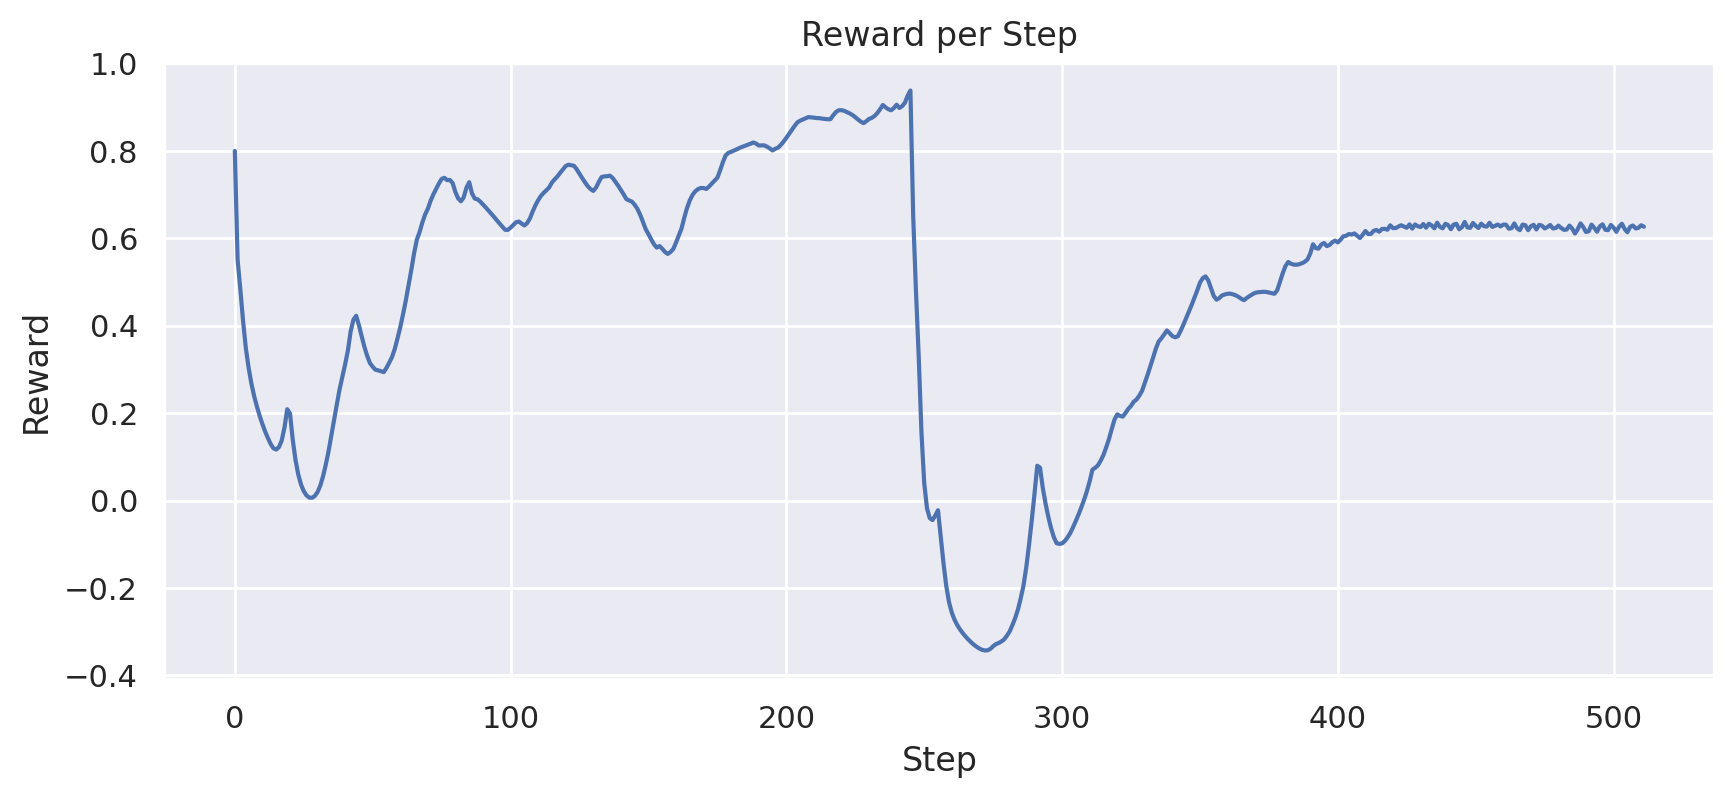

In [11]:
df.groupby("step")["reward"].sum().plot(title="Reward per Step", figsize=(10, 4))
plt.ylabel("Reward")
plt.xlabel("Step")


#### Physical Parameters over Tine (in one Plot)

In [12]:
# fig, ax = plt.subplots(figsize=(10, 5))
# df["x"].plot(label="x position", ax=ax)
# df["x_vel"].plot(label="x velocity", ax=ax)
# df["y_angle"].plot(label="y angle", ax=ax)
# plt.title("Selected Observations over Time")
# plt.xlabel("Step")
# plt.legend()


#### Physical Parameters over Tine (in seperate Plots)

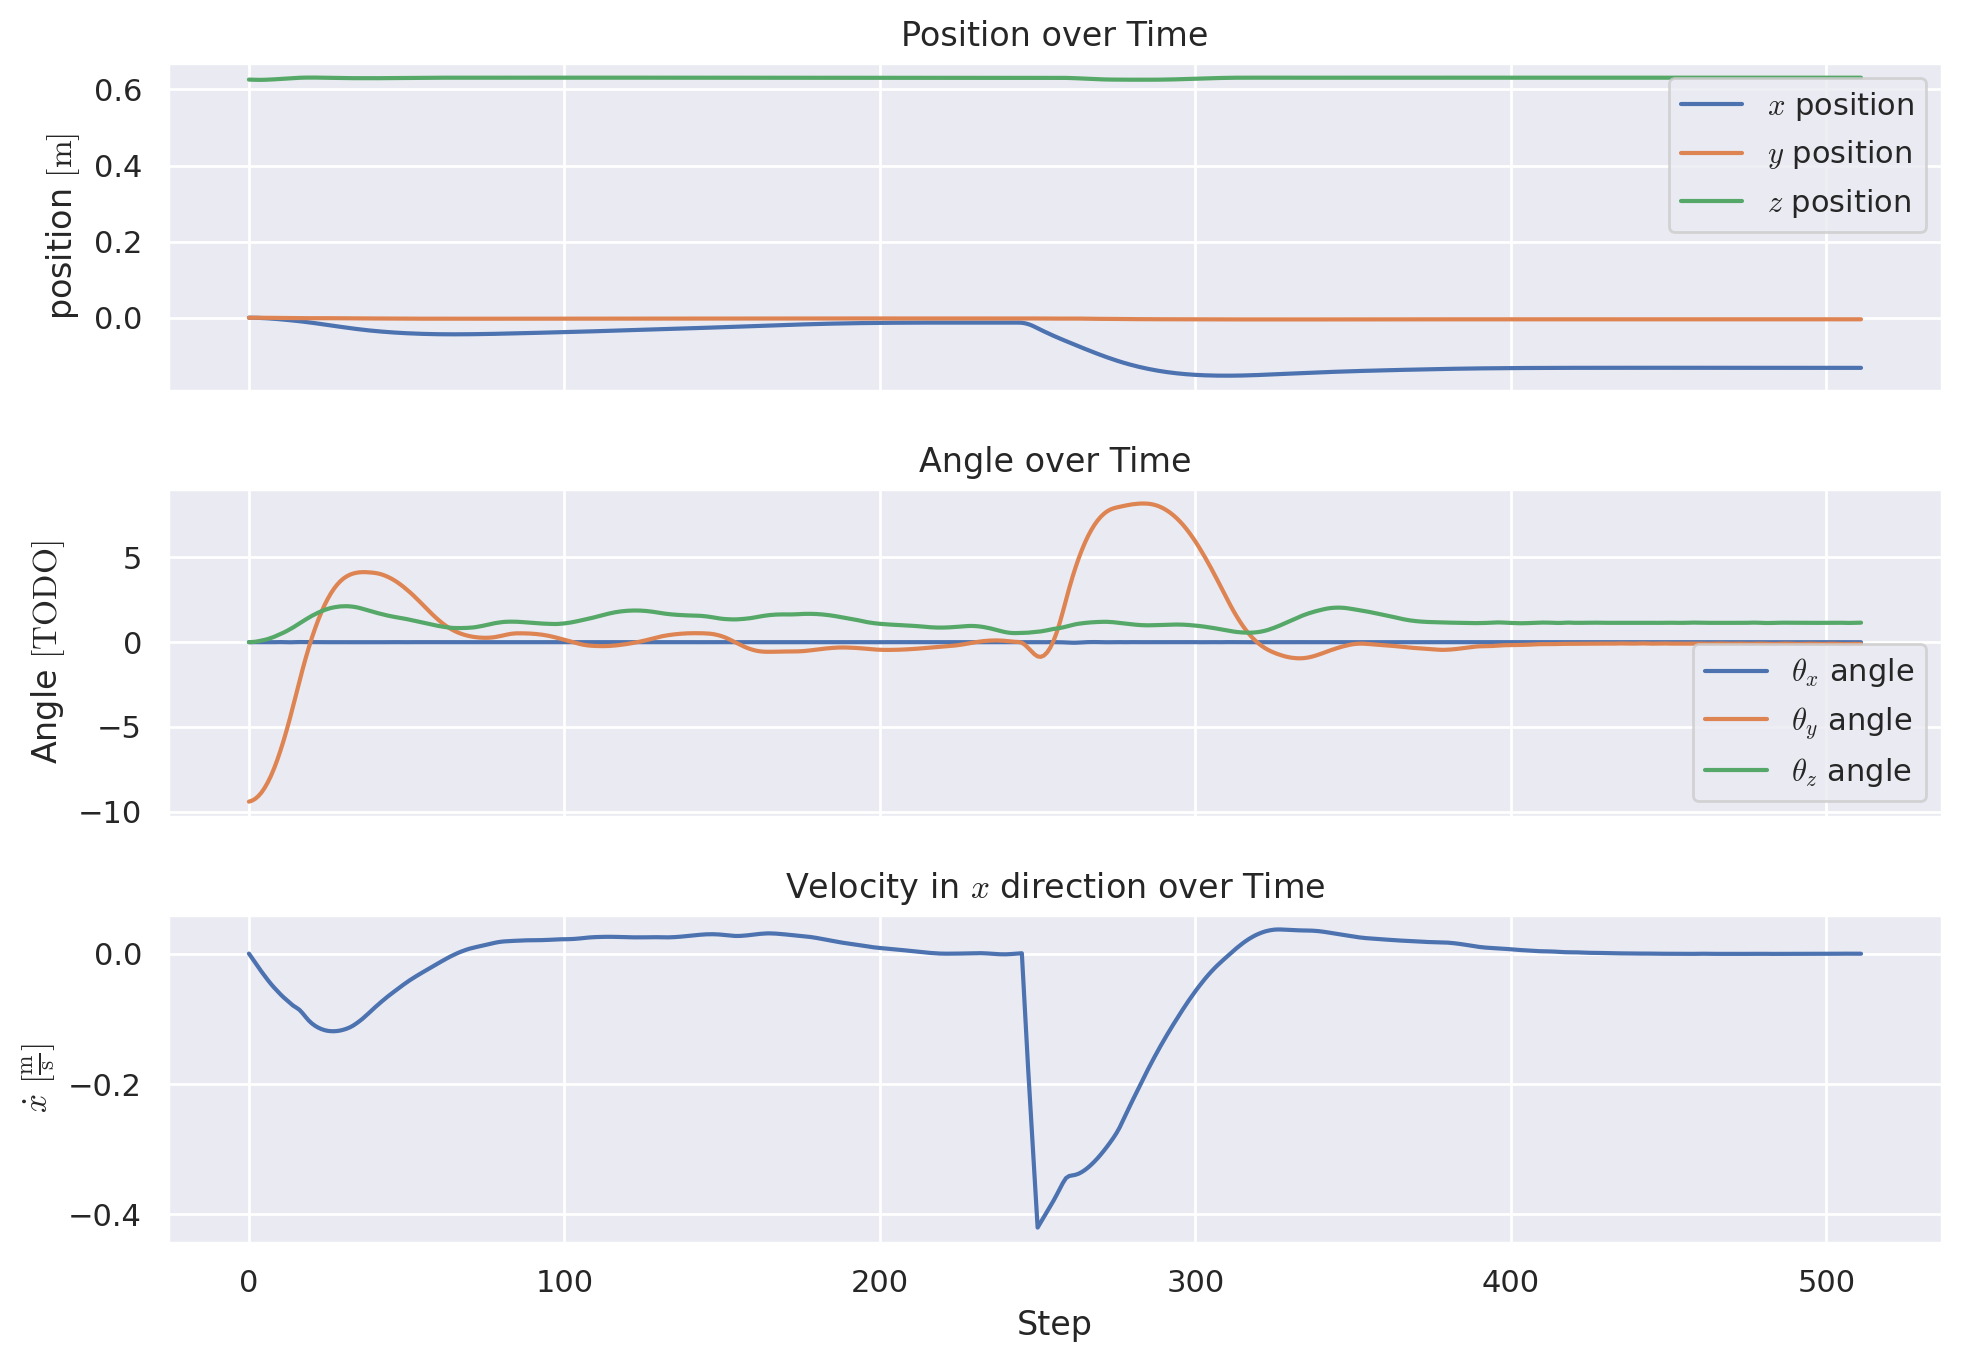

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

# Postitions
df["x"].plot(ax=axes[0], label=r"$x$ position")
axes[0].legend()
df["y"].plot(ax=axes[0], label=r"$y$ position")
axes[0].legend()
df["z"].plot(ax=axes[0], label=r"$z$ position")

axes[0].legend()
axes[0].set_title(r"Position over Time")
axes[0].set_ylabel(r"position $\mathrm{[m]}$")

# Angles
df["x_angle"].plot(ax=axes[1], label=r"$\theta_x$ angle")
axes[1].legend()
df["y_angle"].plot(ax=axes[1], label=r"$\theta_y$ angle")
axes[1].legend()
df["z_angle"].plot(ax=axes[1], label=r"$\theta_z$ angle")
axes[1].legend()

axes[1].set_title(r"Angle over Time")
axes[1].set_ylabel(r"Angle $\mathrm{[TODO]}$")

# Velocities
df["x_vel"].plot(ax=axes[2], label=r"$x$ velocity")
axes[1].legend()
# y_vel isnt extracted and saved yet!
# df["y_vel"].plot(ax=axes[2], label="y velocity")
# axes[1].legend()
# z_vel isnt extracted and saved yet!
# df["z_vel"].plot(ax=axes[2], label="z velocity")
# axes[1].legend()

axes[2].set_title(r"Velocity in $x$ direction over Time")
axes[2].set_ylabel(r"$\dot{x}$ $[\frac{\mathrm{m}}{\mathrm{s}}]$")
axes[2].set_xlabel("Step")


plt.tight_layout()


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

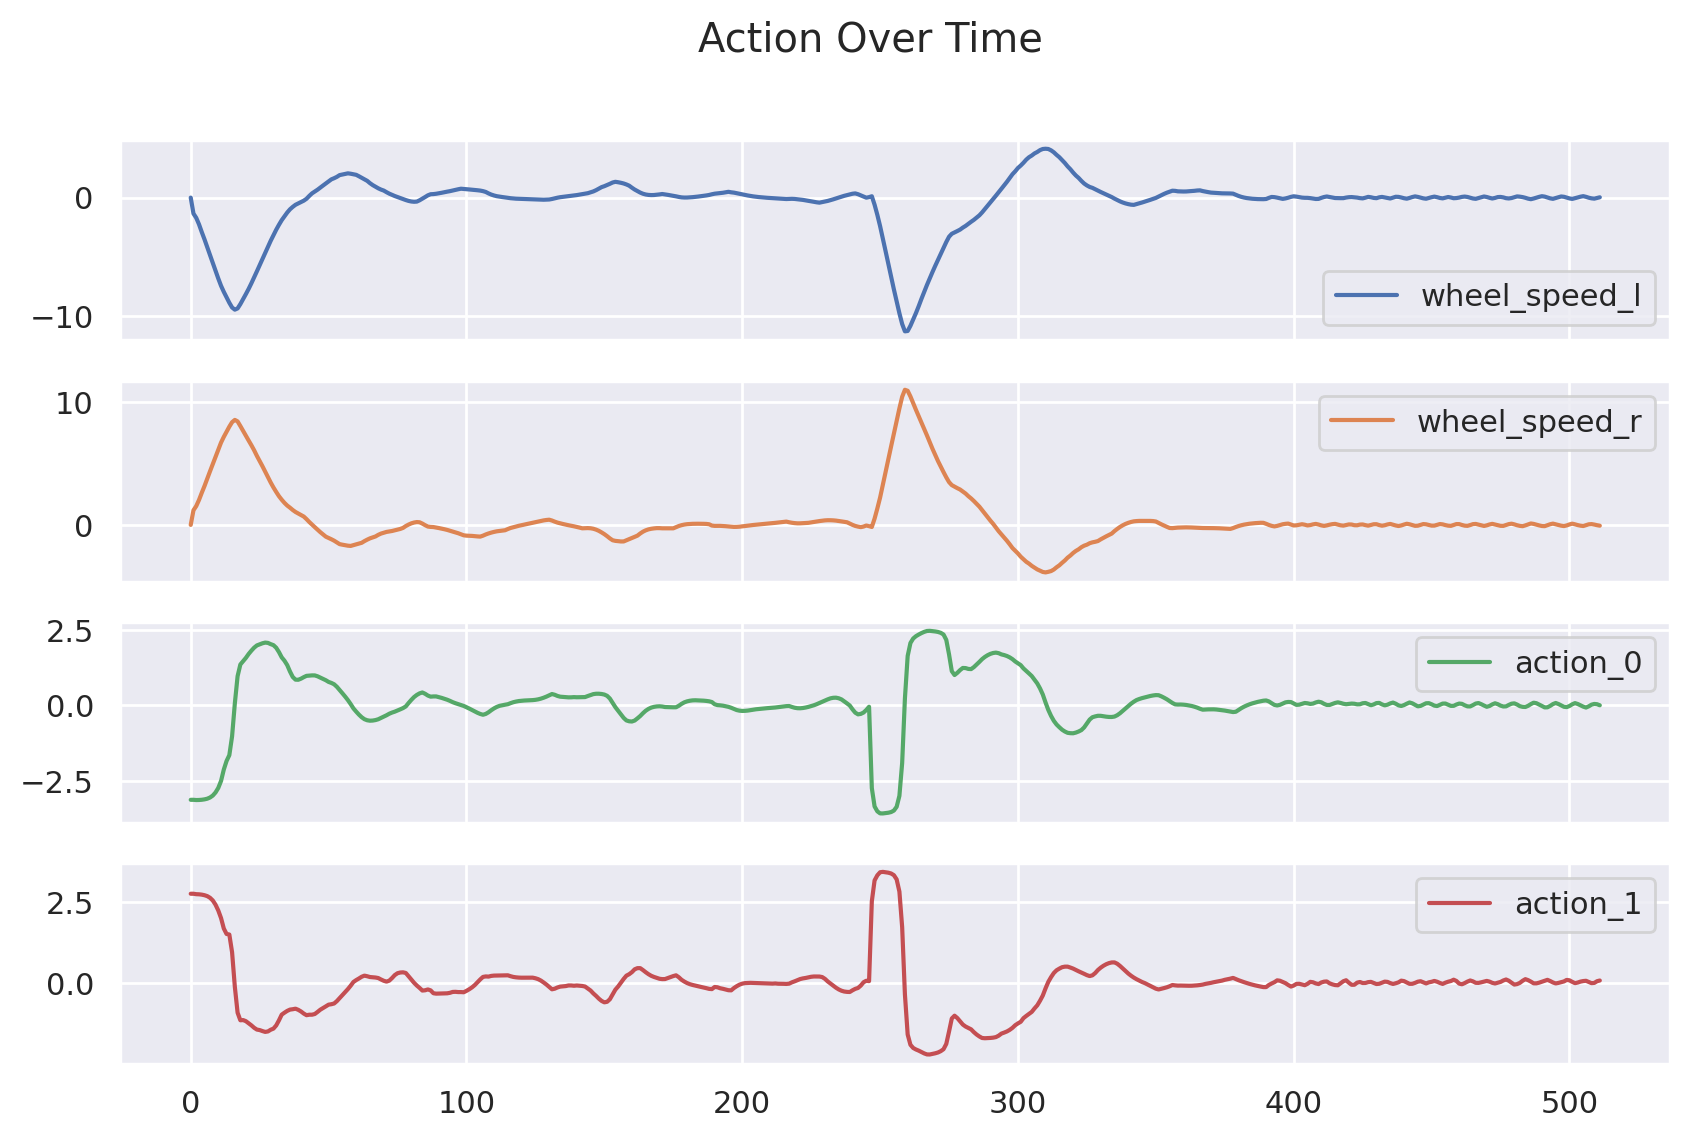

In [17]:
action_cols = [col for col in df.columns if "action" in col or "wheel_speed" in col]
df[action_cols].plot(subplots=True, figsize=(10, 6), title="Action Over Time")


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

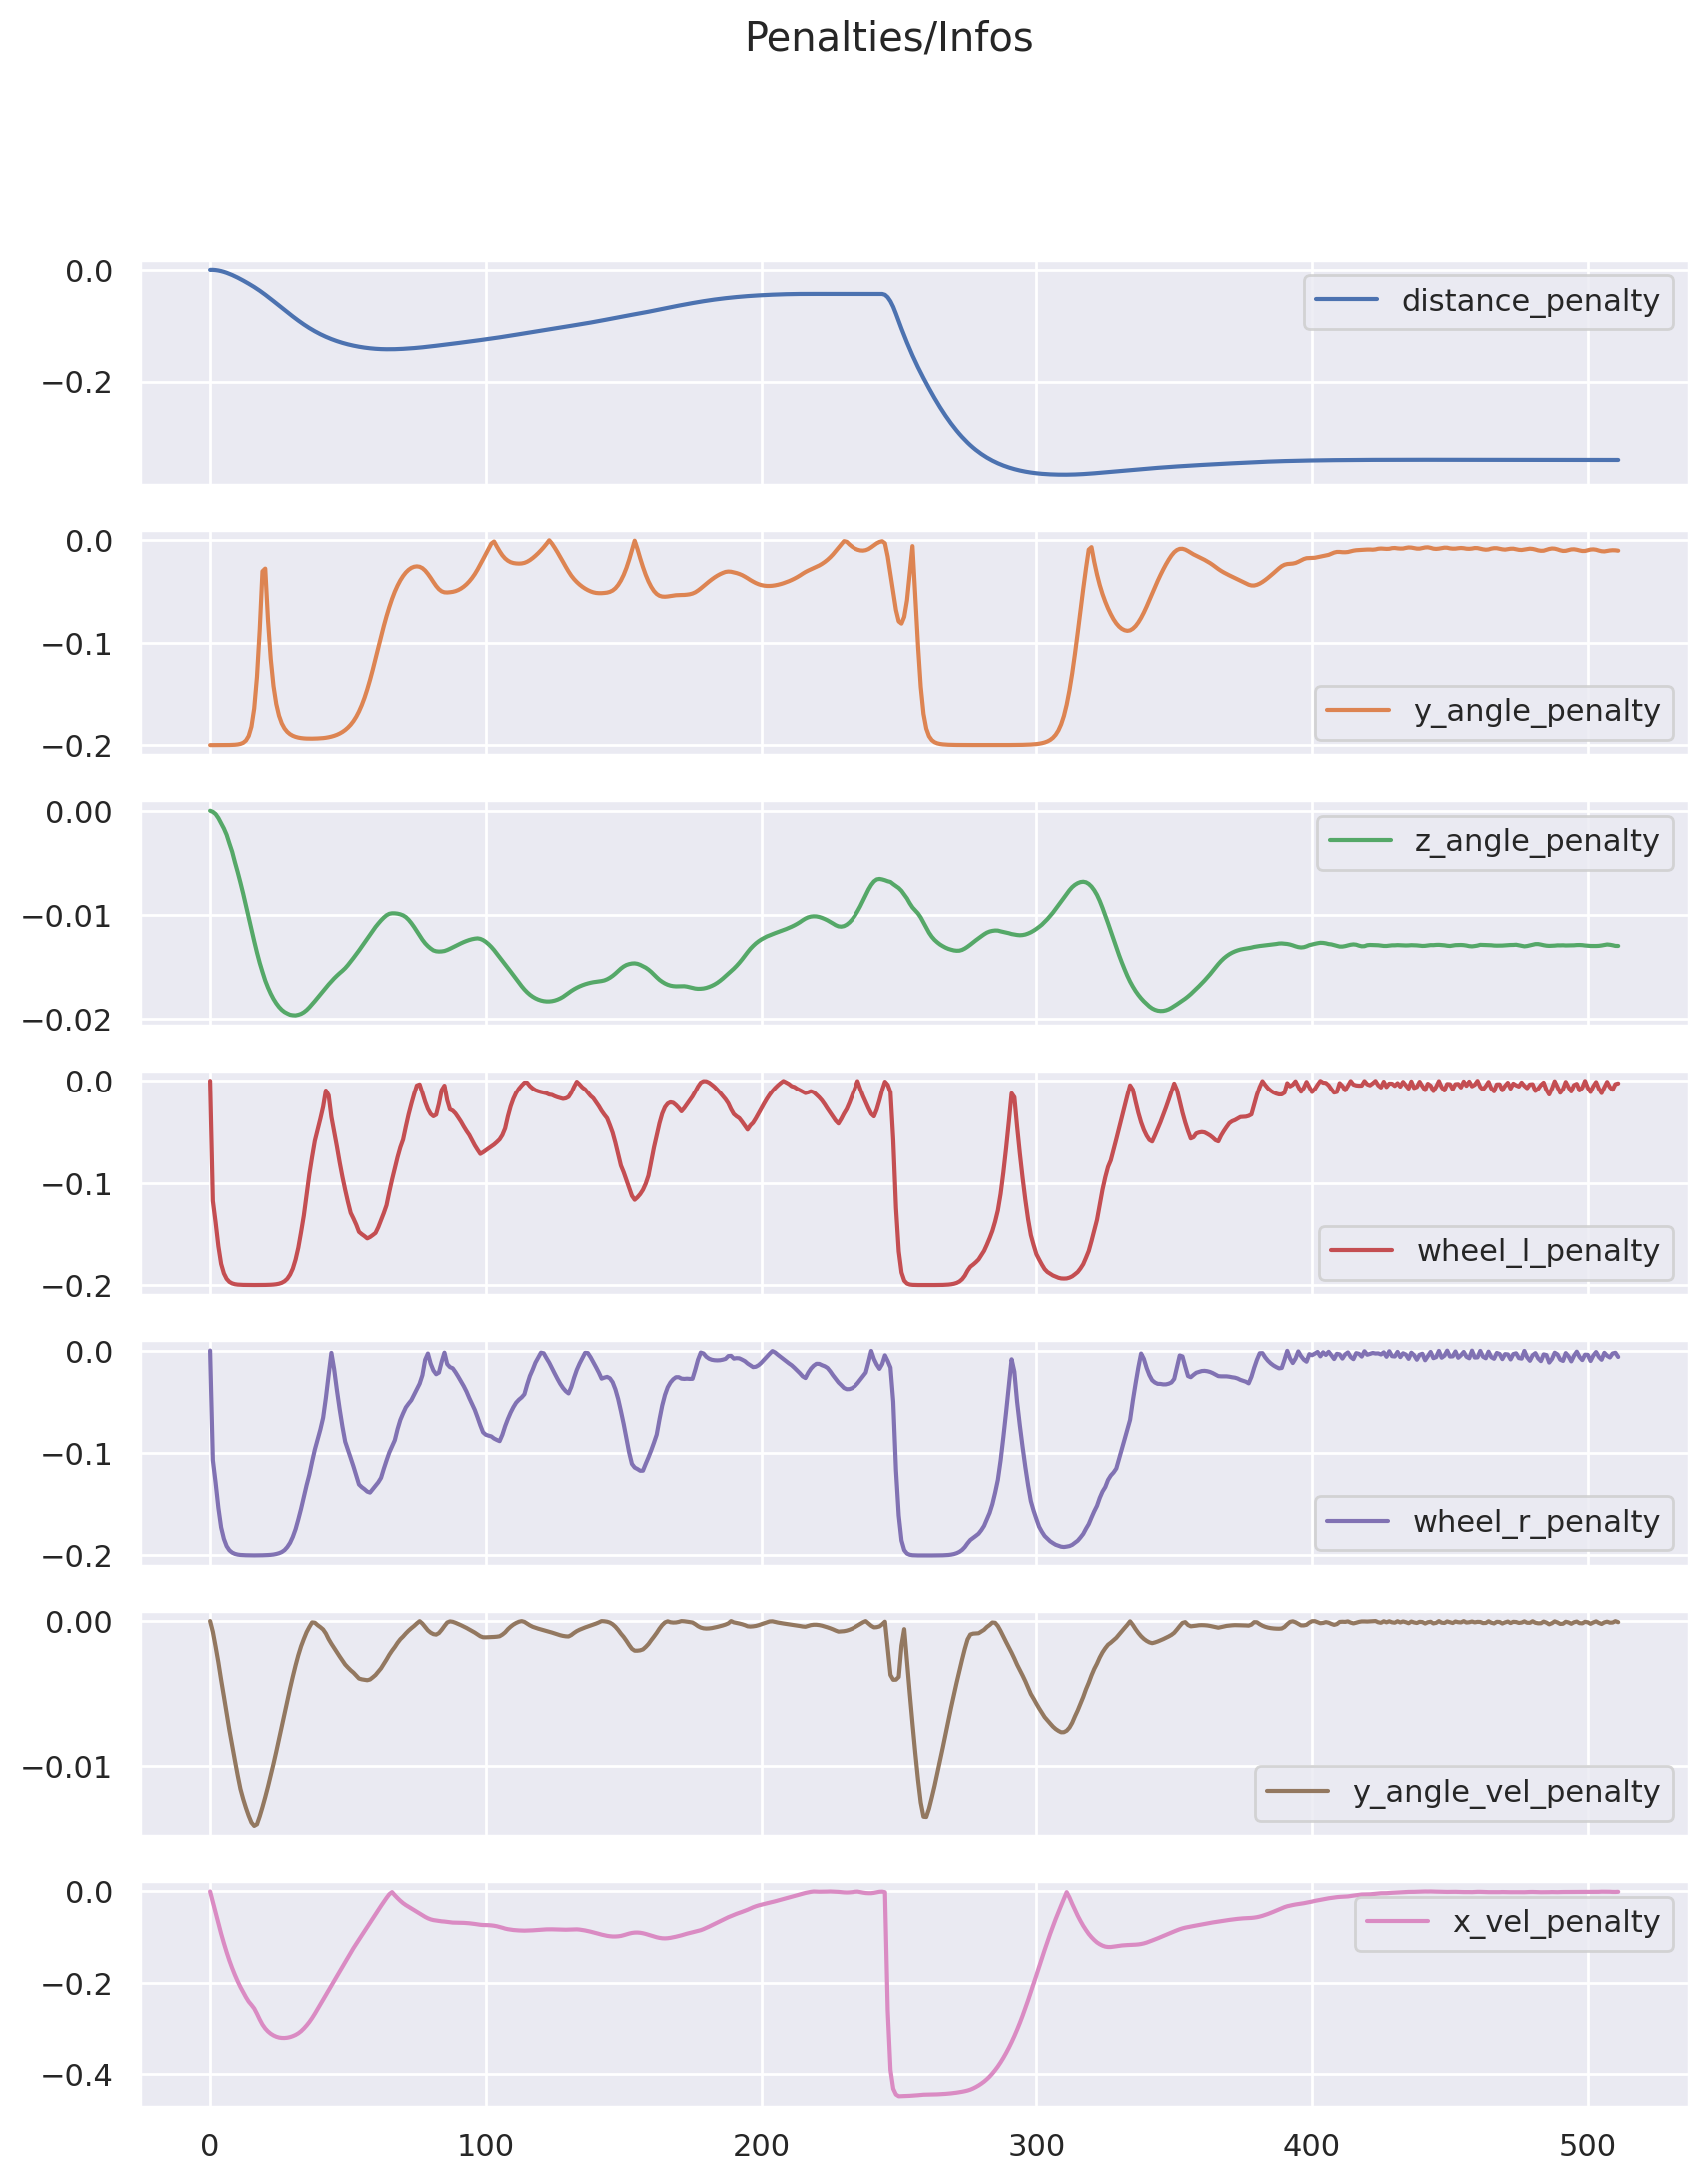

In [15]:
info_cols = [col for col in df.columns if "penalty" in col or "info_" in col]
df[info_cols].plot(subplots=True, figsize=(10, 12), title="Penalties/Infos")